<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"ygeszvain","key":"dd372cdf797a4dd2ce42075be6ec8b83"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [11]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [12]:
!kaggle datasets download -d karangadiya/fifa19

  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 69.0MB/s]


In [15]:
!unzip datasets/karangadiya/fifa19/fifa19.zip

Archive:  datasets/karangadiya/fifa19/fifa19.zip
  inflating: data.csv                


In [54]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.000,4.000,4.000,Medium/ Medium,Messi,Yes,RF,10.000,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.000,95.000,70.000,90.000,86.000,97.000,93.000,94.000,87.000,96.000,91.000,86.000,91.000,95.000,95.000,85.000,68.000,72.000,59.000,94.000,48.000,22.000,94.000,94.000,75.000,96.000,33.000,28.000,26.000,6.000,11.000,15.000,14.000,8.000,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.000,4.000,5.000,High/ Low,C. Ronaldo,Yes,ST,7.000,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.000,94.000,89.000,81.000,87.000,88.000,81.000,76.000,77.000,94.000,89.000,91.000,87.000,96.000,70.000,95.000,95.000,88.000,79.000,93.000,63.000,29.000,95.000,82.000,85.000,95.000,28.000,31.000,23.000,7.000,11.000,15.000,14.000,11.000,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.000,5.000,5.000,High/ Medium,Neymar,Yes,LW,10.000,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.000,87.000,62.000,84.000,84.000,96.000,88.000,87.000,78.000,95.000,94.000,90.000,96.000,94.000,84.000,80.000,61.000,81.000,49.000,82.000,56.000,36.000,89.000,87.000,81.000,94.000,27.000,24.000,33.000,9.000,9.000,15.000,15.000,11.000,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.000,3.000,1.000,Medium/ Medium,Lean,Yes,GK,1.000,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.000,13.000,21.000,50.000,13.000,18.000,21.000,19.000,51.000,42.000,57.000,58.000,60.000,90.000,43.000,31.000,67.000,43.000,64.000,12.000,38.000,30.000,12.000,68.000,40.000,68.000,15.000,21.000,13.000,90.000,85.000,87.000,88.000,94.000,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.000,5.000,4.000,High/ High,Normal,Yes,RCM,7.000,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.000,82.000,55.000,92.000,82.000,86.000,85.000,83.000,91.000,91.000,78.000,76.000,79.000,91.000,77.000,91.000,63.000,90.000,75.000,91.000,76.000,61.000,87.000,94.000,79.000,88.000,68.000,58.000,51.000,15.000,13.000,5.000,10.000,13.000,€196.4M


Text(0.5, 0, 'Age / Overall')

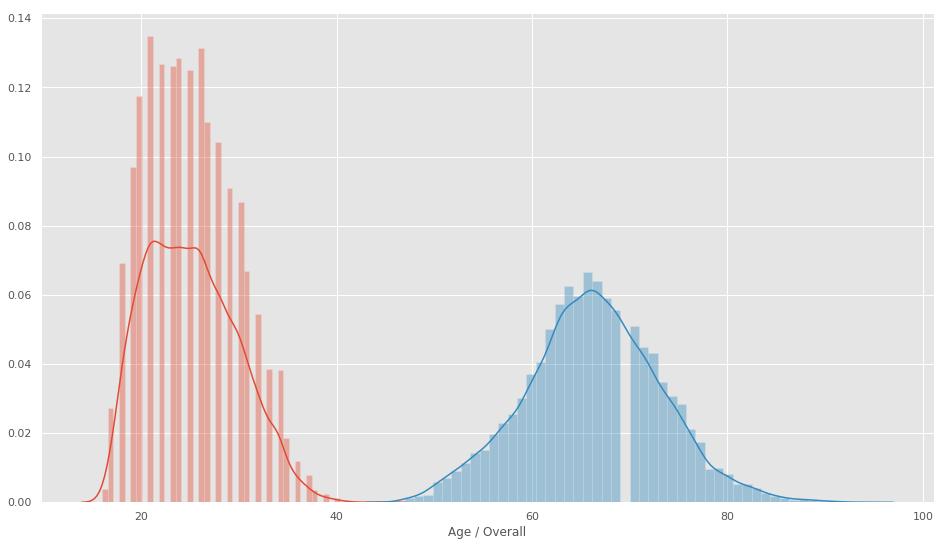

In [19]:
#Visualizing the data - displot
plot_income = sns.distplot(df["Age"])
plot_spend = sns.distplot(df["Overall"])
plt.xlabel('Age / Overall')

[(0, 100)]

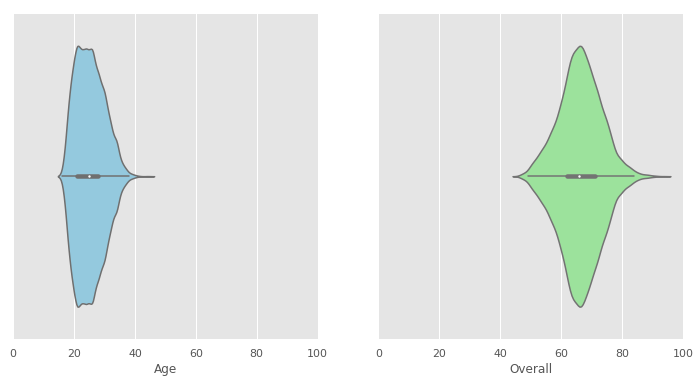

In [21]:
#Violin plot
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=df, x='Age', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=df, x='Overall',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,100))

In [0]:
X = df[["Age","Overall"]]

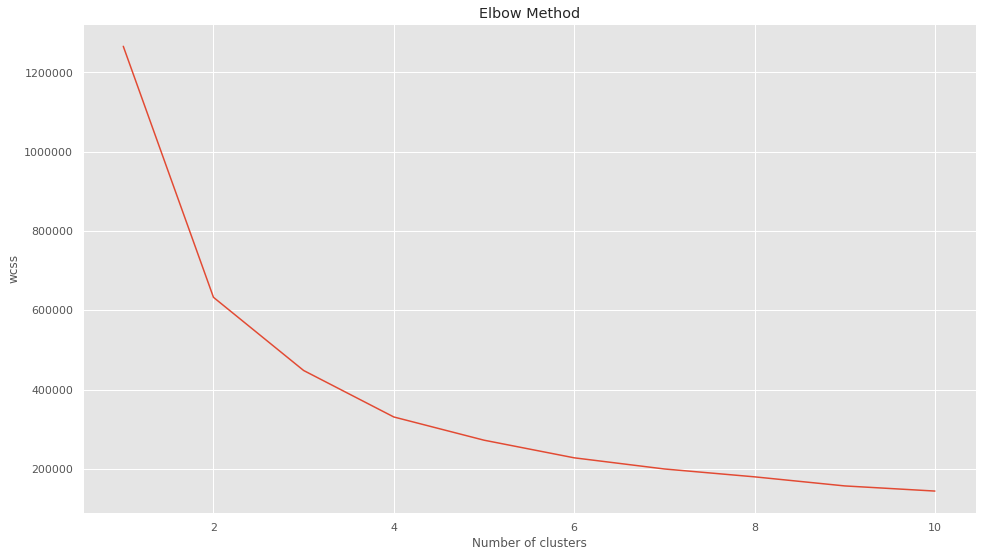

In [28]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

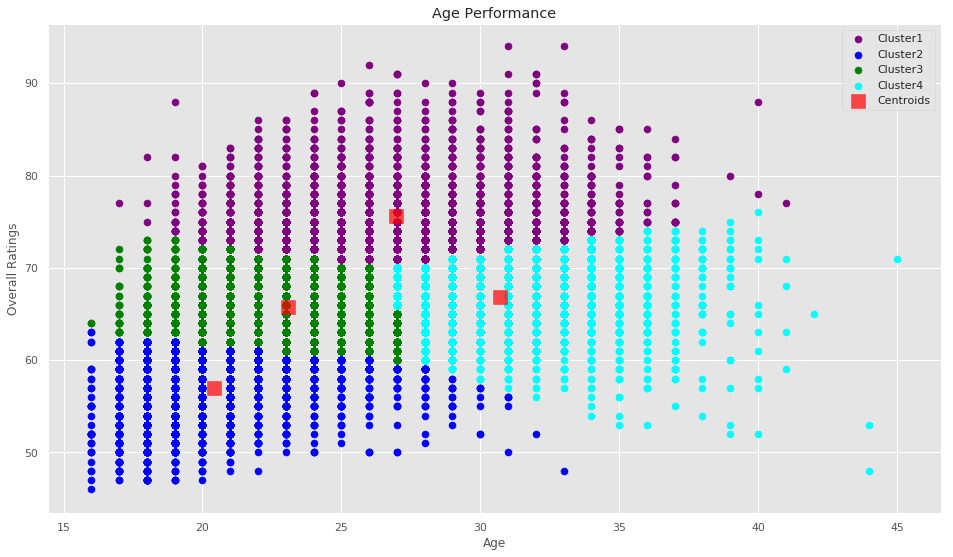

In [39]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Age Performance')
plt.xlabel('Age')
plt.ylabel('Overall Ratings')
plt.legend()
plt.show()

In [0]:
X = df[["Age","Stamina"]]
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

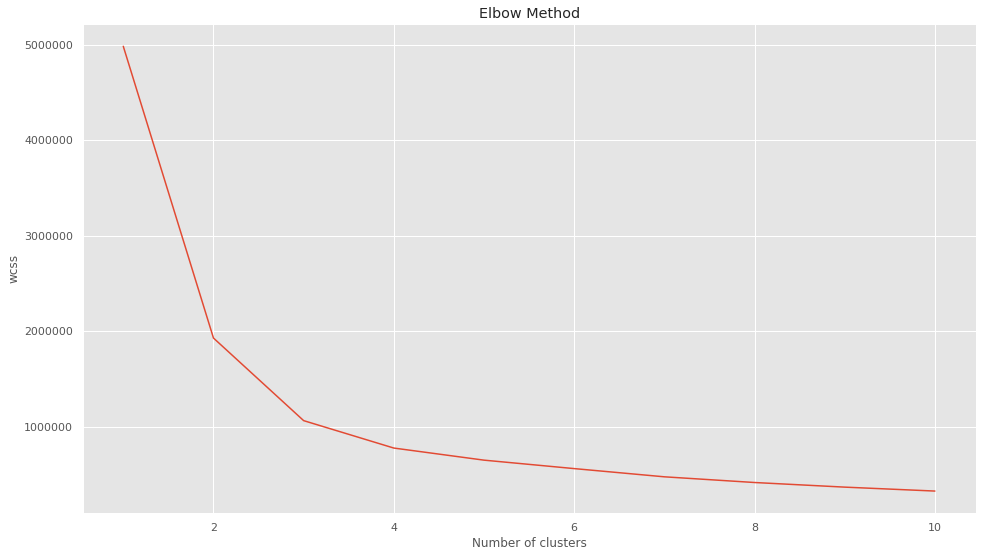

In [57]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

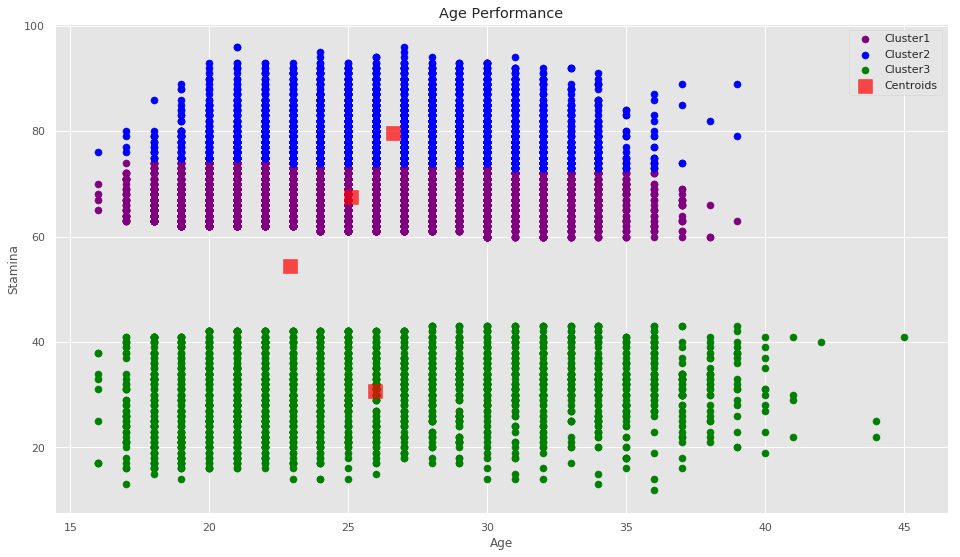

In [59]:
##Fitting kmeans to the dataset with k=3
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=3
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Age Performance')
plt.xlabel('Age')
plt.ylabel('Stamina')
plt.legend()
plt.show()